In [ ]:
#Import thư viện
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Import dữ liệu
df = pd.read_csv("/content/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# Tổng quan dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# Xử lý dữ liệu rỗng
df = df.dropna()

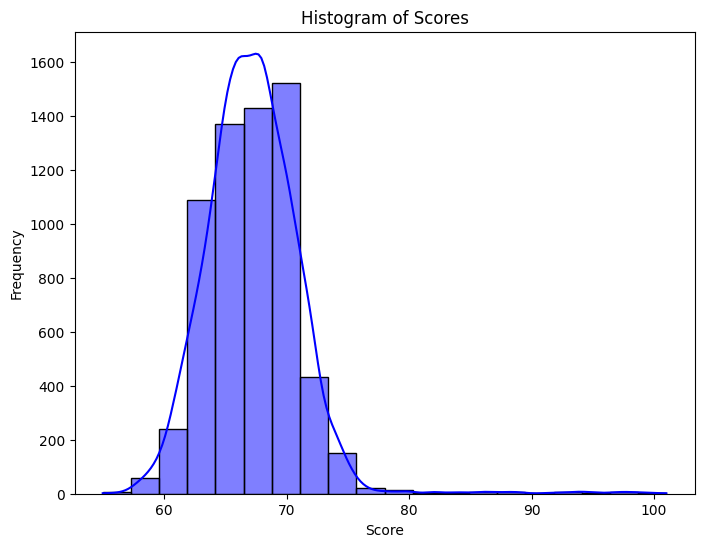

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Exam_Score'], bins=20, kde=True, color='blue')
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Encoder các cột phân loại sang dữ liệu số
object_columns = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()

for col in object_columns:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
# Gỉa định rare envent là score <10%
low_score_threshold = df['Exam_Score'].quantile(0.1)
df['rare_event'] = np.where(df['Exam_Score'] < low_score_threshold, 1, 0)

In [ ]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,rare_event
0,23,84,1,0,0,7,73,1,1,0,...,2,1,2,3,0,1,2,1,67,0
1,19,64,1,2,0,8,59,1,1,2,...,2,1,0,4,0,0,1,0,61,1
2,24,98,2,2,1,7,91,2,1,2,...,2,1,1,4,0,2,2,1,74,0
3,29,89,1,2,1,8,98,2,1,1,...,2,1,0,4,0,1,1,1,71,0
4,19,92,2,2,1,6,65,2,1,3,...,0,1,1,4,0,0,2,0,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,...,2,1,2,2,0,1,2,0,68,0
6603,23,76,0,2,0,8,81,2,1,3,...,0,1,2,2,0,1,2,0,69,0
6604,20,90,2,1,1,6,65,1,1,3,...,2,1,0,2,0,2,2,0,68,0
6605,10,86,0,0,1,6,91,0,1,2,...,2,0,2,3,0,1,0,0,68,0


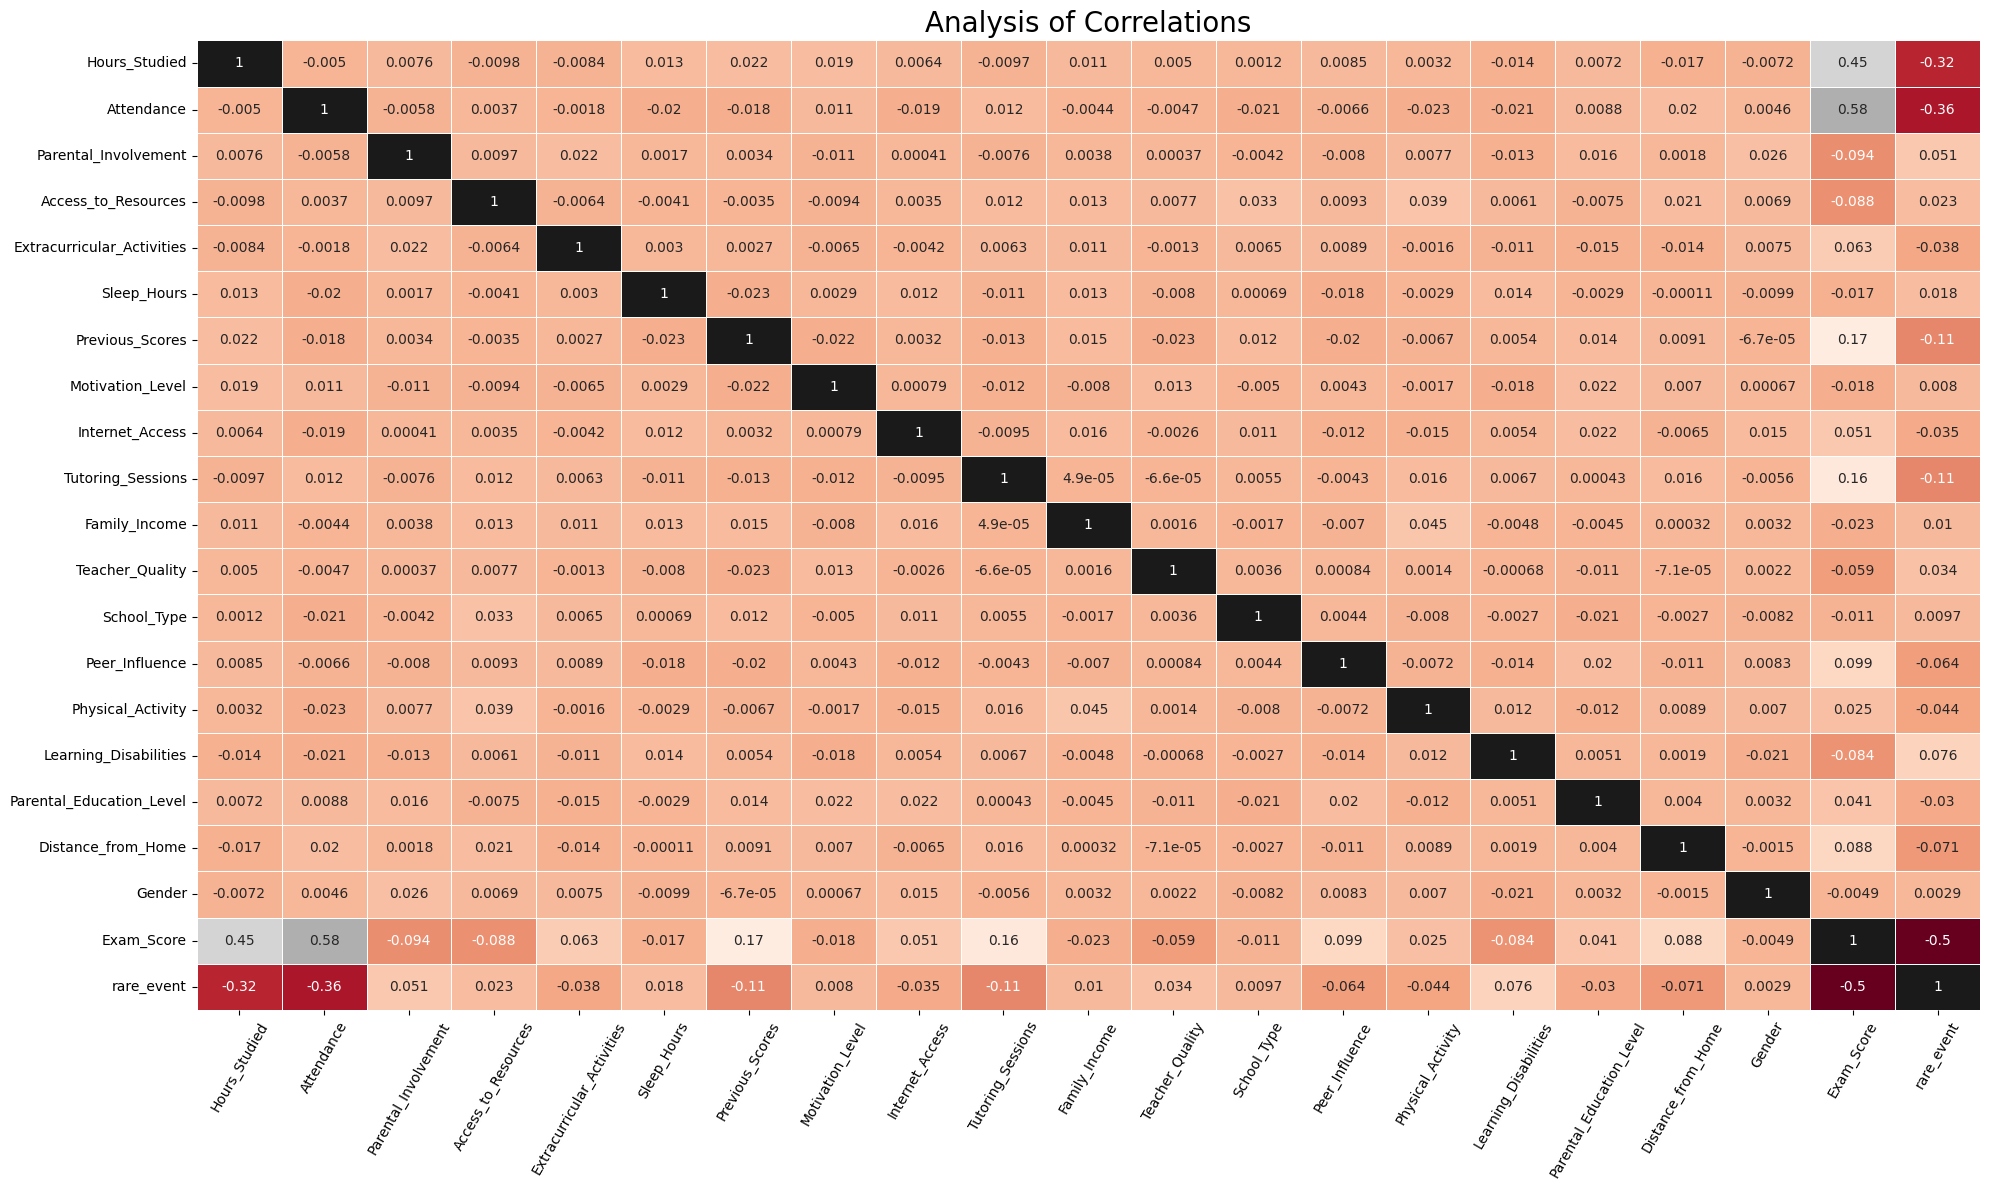

In [ ]:
plt.figure(figsize=(20, 12))

sns.heatmap(df.corr(numeric_only=True), cmap="RdGy", annot=True, linewidths=.6 , cbar = False)

plt.xticks(rotation=60, size=10)

plt.yticks(size=10)

plt.title('Analysis of Correlations', size=20)

plt.tight_layout()

plt.show()

In [ ]:
correlations = df.corr()['Exam_Score'].drop('Exam_Score')
selected_features = correlations[correlations.abs() > 0.1].index.tolist()

In [ ]:
X = df[selected_features]
y = df['Exam_Score']

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

In [ ]:
df['predicted_score'] = linear_model.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['Exam_Score'], df['predicted_score'])
print("Mean Squared Error:", mse)

Mean Squared Error: 6.004012686174471


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(df['Exam_Score'], df['predicted_score'])
print("R-squared:", r2)

R-squared: 0.6080596185411168


In [ ]:
# Tính xác suất sự kiện hiếm thực
p_real_rare_event = df['rare_event'].mean()

In [ ]:
# Tạo phân phối đề xuất dựa trên giá trị dự đoán của SCORE
# Lấy mẫu từ phân phối đề xuất tập trung vào các điểm có giá trị dự đoán thấp hơn ngưỡng 10%
proposal_sample = df[df['predicted_score'] < low_score_threshold].sample(n=500, random_state=42)

In [ ]:
# Tính trọng số cho các mẫu trong phân phối đề xuất
p_proposal_rare_event = (proposal_sample['predicted_score'] < low_score_threshold).mean()
proposal_sample['weight'] = p_real_rare_event / p_proposal_rare_event

In [ ]:
import numpy as np
from scipy.stats import norm

estimated_probability = (proposal_sample['rare_event'] * proposal_sample['weight']).sum() / proposal_sample['weight'].sum()

# Tính Standard Error
total_weight = proposal_sample['weight'].sum()
se = np.sqrt(estimated_probability * (1 - estimated_probability) / total_weight)

# Khoảng tin cậy 95%
alpha = 0.05
z_value = norm.ppf(1 - alpha / 2)
lower_bound = estimated_probability - z_value * se
upper_bound = estimated_probability + z_value * se

print("Ước lượng xác suất của sự kiện hiếm:", estimated_probability)
print("Standard Error:", se)
print(f"Khoảng tin cậy 95%: [{lower_bound}, {upper_bound}]")


Ước lượng xác suất của sự kiện hiếm: 0.896
Standard Error: 0.045746067020972676
Khoảng tin cậy 95%: [0.806339356204538, 0.985660643795462]
